### Bài toán định giá giá nhà (House Price Problem)

***Các bước thực hiện 1 bài toán***

1. Understanding data - Hiểu về dữ liệu
2. Preprocessing - Tiền xử lý dữ liệu: 
    - Remove outliers: Loại bỏ bất thường các dữ liệu sai khác quá nhiều
    - Missing data process: Xử lý các dữ liệu bị thiếu
    - Sampling: Cân bằng lại dữ liệu
3. Features engineering - Trích chọn ra các đặc trưng của dữ liệu
4. Selection algorithums - Lựa chọn thuật toán
5. Training - Huấn luyện thuật toán
6. Fine-tuning - Tinh chỉnh mô hình
7. Evaluation - Đánh giá tinh chỉnh mô hình
8. Deployment

In [1]:
import tensorflow as tf

In [2]:
import numpy as np

In [4]:
# x = [1, 2, 3, 4] <=> [x0, x1, x2, x3]
# y = [2] <=> w_init + w_0*x_0 + ... + w_3*x_3
# Việc cần làm là tìm các hệ số w_init w_0 w_1 w_2 w_3

# Tạo dữ liệu gôm 10000 dòng và 2 cột
x_data = np.random.random((10000, 2)) 

# Sau khi có x_data phải sinh hệ số w_0 w_1 ...
sample_weights = np.array([3, 4]).reshape(2, ) 
# Khởi tạo 1 mảng gồm 1 dòng và 2 cột. Hàm reshape có tác dụng chuyển mảng 
# vừa tạo thành ma trận gồm 2 cột

# Khởi tạo y_data
y_data = np.matmul(x_data, sample_weights) # Hàm nhân 2 ma trận

In [9]:
x_data[0]

array([0.68101369, 0.04919996])

In [10]:
y_data[0] # Bằng 0.68101369 * 3 + 4 * 0.04919996

2.2398409088872455

***Note*** Ở đây ta đang nhân với một số fix cứng là 3 nhân 4 thì mô hình sẽ xảy ra hiện tượng là overfeeting (Hàm không có tính ngẫu nhiên)

In [11]:
# Xấp xỉ hóa y để dữ liệu mang tính ngẫu nhiên
y_data = np.add(y_data, np.random.uniform(-0.5, 0.5))
# Cộng nó với 1 đại lượng random trong khoản -0.5 đến 0.5

In [12]:
y_data[0]

1.8290594035222834

In [13]:
y_data.shape

(10000,)

In [14]:
x_data.shape

(10000, 2)

In [15]:
# y_data cần phải reshape thành ma trận 10000 * 1
y_data = y_data.reshape(len(y_data), 1)

In [16]:
y_data.shape

(10000, 1)

In [17]:
# Đến bước này ta đã có tập dữ liệu fake hoàn chỉnh
x_data # Mẫu dữ liệu từng dòng tương đương : 
# [Khoảng cách đến trung tâm thành phố, diện tích sử dụng]

array([[0.68101369, 0.04919996],
       [0.26829642, 0.05628379],
       [0.12118309, 0.47435351],
       ...,
       [0.19538334, 0.59463397],
       [0.17977397, 0.44011129],
       [0.04822305, 0.92390707]])

In [19]:
y_data
# Mẫu dữ liệu từng dòng tương đương : [Giá nhà đổi ra việt nam đồng]

array([[1.8290594 ],
       [0.6192429 ],
       [1.85018178],
       ...,
       [2.55390439],
       [1.88898554],
       [3.42951593]])

***Note*** Tất cả data cần tách ra thành 2 tập là tập tranning và tập testing

In [24]:
from sklearn.model_selection import train_test_split
# Cài đặt thư viện "sklearn" : pip install scipy & pip install -U scikit-learn

In [27]:
x_train, x_test, y_train, y_test = train_test_split(x_data, y_data, test_size = 0.2, random_state = 42)
# Mục đích của hàm train_test_split là tách tập dữ liệu thành 2 phần
# - Phần traning và phần testing
# - Phần testing để riêng ko đụng để test lại dữ liệu
# Tỷ lệ traing là 80% và tỷ lệ testing là 20%

In [28]:
x_train.shape

(8000, 2)

In [29]:
y_train.shape

(8000, 1)

***Cài đặt thuật toán***

In [30]:
n_dim = x_train.shape[1]
print(n_dim)

2


In [31]:
#Truyền dữ liệu vào placeholder
x = tf.placeholder(tf.float32, [None, n_dim])
y = tf.placeholder(tf.float32, [None, 1])

In [33]:
# Các hệ số có thể dùng để traning
w = tf.Variable(tf.ones([n_dim, 1])) # Gía trị khởi tạo toàn giá trị 1
b = tf.Variable(np.random.randn(), dtype=tf.float32)

In [34]:
pred = tf.add(tf.matmul(x, w), b) # Hàm dự đoán predict

In [37]:
loss = tf.reduce_mean(tf.square(pred - y)) # Lấy theo giá trị trung bình (Hàm mất mát)
learning_rate = 0.01 #Tốc độ học
optimizer = tf.train.GradientDescentOptimizer(learning_rate=learning_rate).minimize(loss) #Cực tiểu hóa hàm mất mát

In [38]:
init = tf.global_variables_initializer()

In [39]:
session = tf.Session()

In [55]:
# Traning
session.run(init)
epochs = 5000

lost_history = []

for epochs in range(epochs):
    session.run(optimizer, feed_dict={x: x_train, y: y_train})
    
    test_lost = session.run(loss, feed_dict={x : x_test, y : y_test})
    
    lost_history.append(test_lost)
    
    if epochs % 500 == 0:
        print("Epoch {} Test loss = {}".format(epochs, test_lost))
        
print("Training finished")

Epoch 0 Test loss = 5.324346542358398
Epoch 500 Test loss = 0.1773737221956253
Epoch 1000 Test loss = 0.057760342955589294
Epoch 1500 Test loss = 0.018957942724227905
Epoch 2000 Test loss = 0.006252152379602194
Epoch 2500 Test loss = 0.002067848574370146
Epoch 3000 Test loss = 0.0006851011421531439
Epoch 3500 Test loss = 0.00022720835113432258
Epoch 4000 Test loss = 7.540109072579071e-05
Epoch 4500 Test loss = 2.5030802135006525e-05
Training finished


In [56]:
session.run(w)

array([[2.9930634],
       [3.992907 ]], dtype=float32)

In [58]:
session.run(b)

-0.40339297

In [59]:
import matplotlib.pyplot as plt

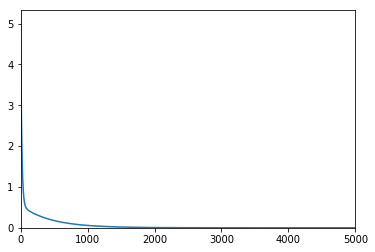

In [60]:
plt.plot(range(len(lost_history)), lost_history)
plt.axis([0, epochs, 0, np.max(lost_history)])
plt.show()

In [63]:
pred_y = session.run(pred, feed_dict={
    x: [[3,10]]
})

In [64]:
print(pred_y)

[[48.504868]]


***Note*** 
Nhược điểm của thuật toán chính xác chưa thể cao
<br>
Đang giả định dữ liệu liên kết với nhau theo dạng tuyến tính đôi khi các dữ liệu liên kết vs nhau theo dạng phi tuyến
<br>
Thuật toán rất nhạy cảm với nhiễu